<a href="https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/LifeStyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 日本の地域別 ライフスタイル分析

In [ ]:
# グラフの日本語表示のために japanize-matplotlib をインストール
!pip install japanize-matplotlib

# ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# Warning を非表示に設定
import warnings
warnings.resetwarnings()
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# DataSample.xlsx の読み込み
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/LifeStyle.xlsx')
df.head()

,ID,三区分,八区分,推定人口,睡眠,食事,通勤通学,仕事,買い物,メディア,休養,自己啓発,趣味,スポーツ,交際,受診療養,起床,就寝
0,北海道,East,北海道,4756,471,94,25,206,25,158,104,10,52,13,16,9,06:26:00,22:56:00
1,青森県,East,東北,1152,479,99,24,219,25,151,99,6,47,10,14,9,06:18:00,22:38:00
2,岩手県,East,東北,1135,474,101,25,223,24,131,98,11,45,11,14,7,06:17:00,22:43:00
3,宮城県,East,東北,2091,466,101,30,212,27,131,97,9,45,13,17,8,06:25:00,22:56:00
4,秋田県,East,東北,906,482,104,22,204,23,144,106,9,46,13,15,8,06:20:00,22:33:00


In [10]:
# 基本統計量を表示
df.describe()


,推定人口,睡眠,食事,通勤通学,仕事,買い物,メディア,休養,自己啓発,趣味,スポーツ,交際,受診療養
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2410.723404,463.425532,99.446809,29.319149,215.127660,24.893617,139.000000,98.489362,11.212766,44.659574,14.127660,16.361702,7.872340
std,2472.592142,6.971198,2.627683,5.505359,10.199354,1.747471,9.677405,4.287861,2.235447,4.208049,1.526819,1.762231,1.034556
min,501.000000,451.000000,94.000000,22.000000,194.000000,21.000000,115.000000,90.000000,6.000000,35.000000,10.000000,13.000000,6.000000
25%,973.500000,459.500000,98.000000,25.000000,208.500000,24.000000,132.000000,96.000000,10.000000,42.000000,13.000000,15.000000,7.000000
50%,1424.000000,462.000000,99.000000,28.000000,213.000000,25.000000,140.000000,99.000000,11.000000,45.000000,14.000000,16.000000,8.000000
75%,2422.500000,467.000000,101.500000,31.000000,223.000000,26.000000,144.000000,100.500000,12.000000,48.000000,15.000000,17.000000,8.500000
max,12346.000000,482.000000,105.000000,46.000000,238.000000,28.000000,158.000000,109.000000,16.000000,52.000000,17.000000,21.000000,10.000000


In [11]:
# 相関行列を表示
df.corr()

,推定人口,睡眠,食事,通勤通学,仕事,買い物,メディア,休養,自己啓発,趣味,スポーツ,交際,受診療養
推定人口,1.000000,-0.561385,0.269711,0.788372,-0.203354,0.395423,-0.387387,-0.433967,0.606871,0.479768,0.105878,0.438610,0.040965
睡眠,-0.561385,1.000000,-0.087744,-0.773399,0.278366,-0.556547,0.349950,0.504151,-0.699245,-0.301754,-0.530119,-0.237539,-0.007375
食事,0.269711,-0.087744,1.000000,0.311515,-0.110867,0.138404,-0.486432,-0.178041,0.198115,0.120220,0.126356,0.100486,0.085412
通勤通学,0.788372,-0.773399,0.311515,1.000000,-0.208643,0.523332,-0.581858,-0.571276,0.725657,0.397970,0.326087,0.330678,-0.053760
仕事,-0.203354,0.278366,-0.110867,-0.208643,1.000000,-0.587126,-0.194919,-0.074531,-0.393092,-0.435071,-0.076453,-0.090919,-0.068470
買い物,0.395423,-0.556547,0.138404,0.523332,-0.587126,1.000000,-0.155546,-0.117657,0.373212,0.429547,0.135567,0.076302,0.040424
メディア,-0.387387,0.349950,-0.486432,-0.581858,-0.194919,-0.155546,1.000000,0.286569,-0.490387,-0.293606,-0.366349,-0.271519,0.104225
休養,-0.433967,0.504151,-0.178041,-0.571276,-0.074531,-0.117657,0.286569,1.000000,-0.439745,-0.147193,-0.345128,-0.228201,0.171208
自己啓発,0.606871,-0.699245,0.198115,0.725657,-0.393092,0.373212,-0.490387,-0.439745,1.000000,0.430777,0.475934,0.322182,-0.138399
趣味,0.479768,-0.301754,0.120220,0.397970,-0.435071,0.429547,-0.293606,-0.147193,0.430777,1.000000,0.094884,0.163544,-0.150018


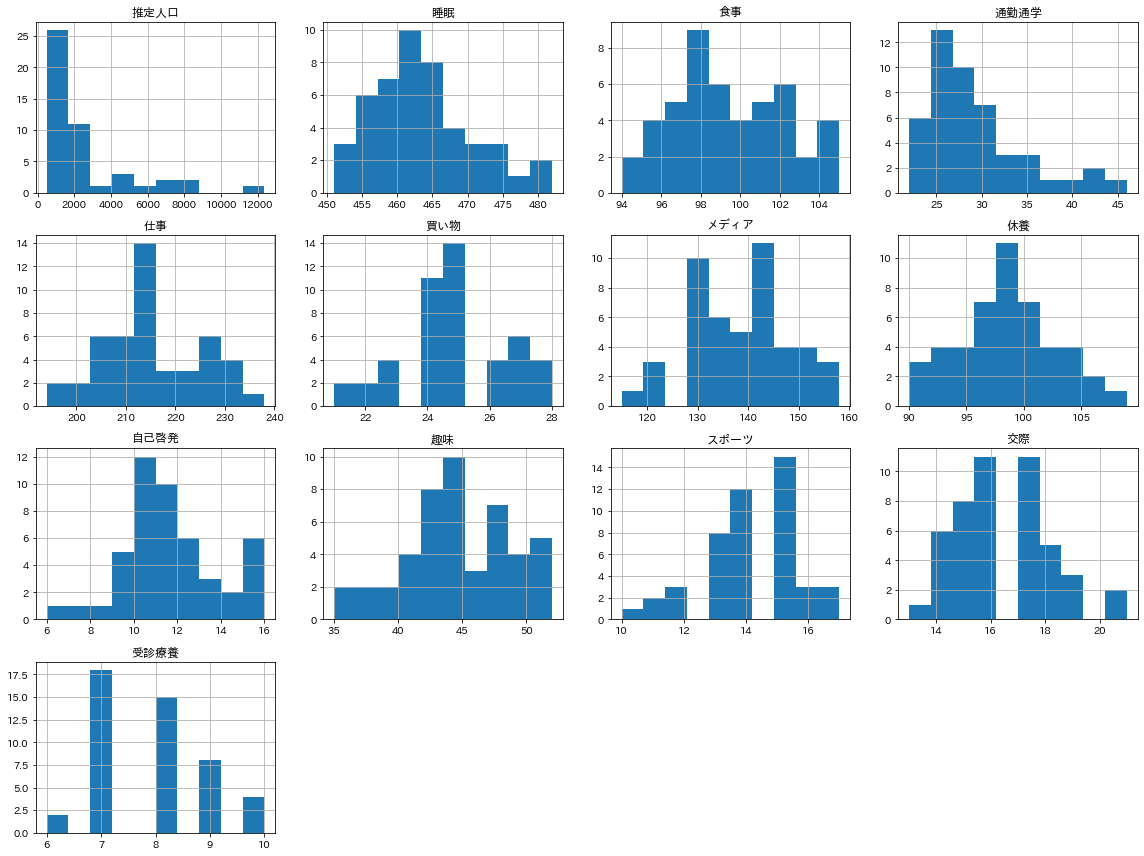

In [31]:
# pandas > japanese_matplotlib でヒストグラムの一括表示
df.hist(figsize=(16,12))
plt.tight_layout()

## 分析

In [52]:
# 区分別のデータ件数（ value_counts() ）
area_counts = df['八区分'].value_counts()
area_counts

中部      9
九州沖縄    8
関東      7
関西      7
東北      6
中国      5
四国      4
北海道     1
Name: 八区分, dtype: int64

In [53]:
# クロス集計｜三区分に該当する八区分地域の都道府県の数
cross_table_area = pd.crosstab( df['三区分'] , df['八区分'] )
cross_table_area

八区分,中国,中部,九州沖縄,北海道,四国,東北,関東,関西
三区分,,,,,,,,
Central,0,8,0,0,0,0,7,2
East,0,1,0,1,0,6,0,0
West,5,0,8,0,4,0,0,5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


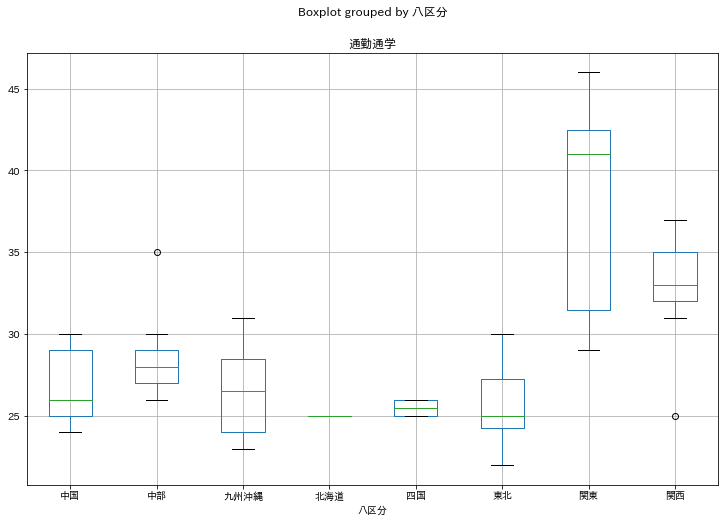

In [51]:
# 箱ひげ図｜エリア別の通勤通学の分布を比較
fig = df.boxplot(column='通勤通学',by='八区分', figsize=(12,8))


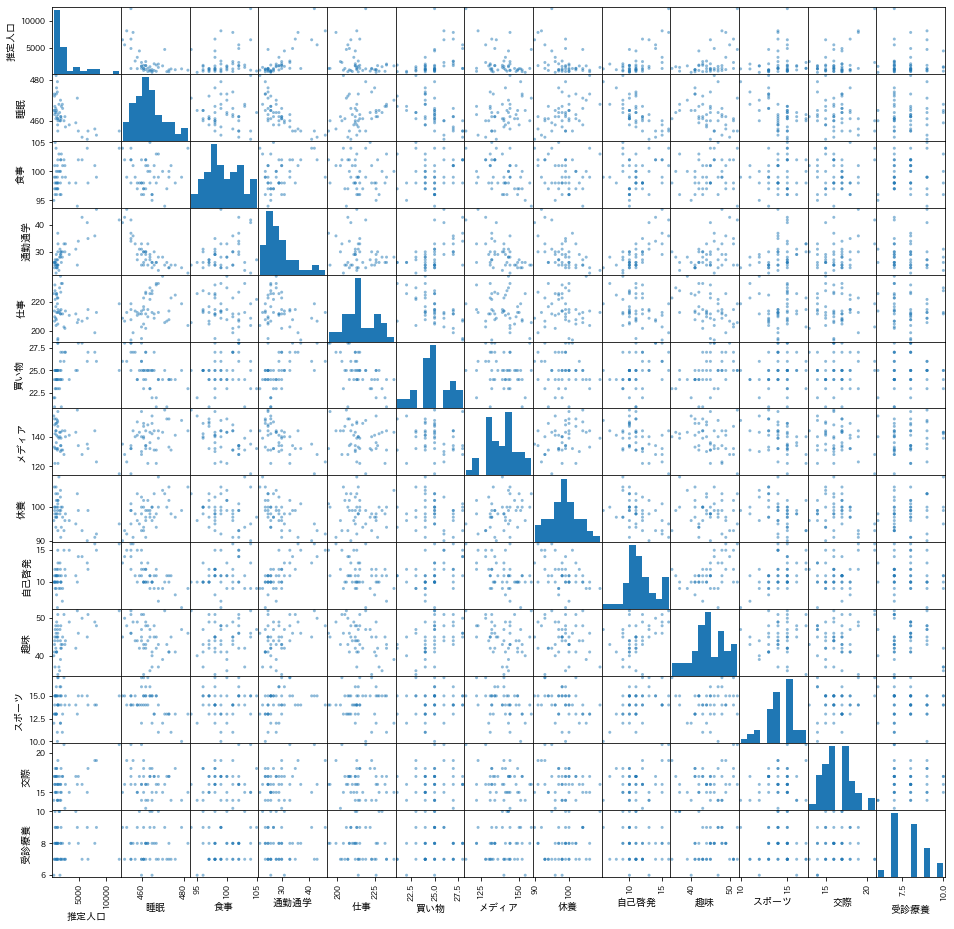

In [50]:
# 散布図行列
fig = pd.plotting.scatter_matrix(df, figsize=(16,16), )


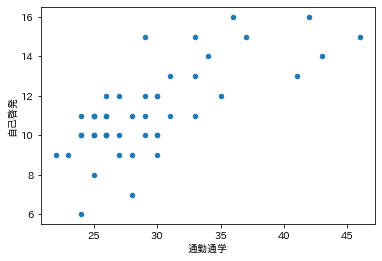

In [32]:
# 散布図｜通勤通学 と 自己啓発 の相関を散布図で確認
df.plot.scatter(x='通勤通学', y='自己啓発')